# How Autoencoders work - Understanding the math and implementation by Shivam Bansal_1

[원작자는 여기!](https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases)

**Contents**
* 1. 소개
     * 1.1 오토인코더가 무엇인가?
     * 1.2 오토인코더를 어떻게 작동시키나?
* 2. 구현과 사용예시
     * 2.1 예시1 : Image Reconstruction
     * 2.2 예시2 : Noise Removal 
     * 2.3 예시3 : Sequence to Sequence Prediction     
     

# Intoduction

## 오토인코더가 무엇인가요?
대표적인 비지도 학습으로 아래 그림과 같이 입력값과 출력값을 같게 하는 신경망이다. _(y값이 없음)_ 가운데 계층(은닉층)의 노드 수가 입력값보다 적은 것이 특징이며, 이런 구조로 인해 입력 데이터를 압축하는 효과를 얻게 된다. 또한 노이즈 제거에도 매우 효과적이다. [참고1](https://sunghan-kim.github.io/ml/3min-dl-ch08/#81-%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94-%EA%B0%9C%EB%85%90)
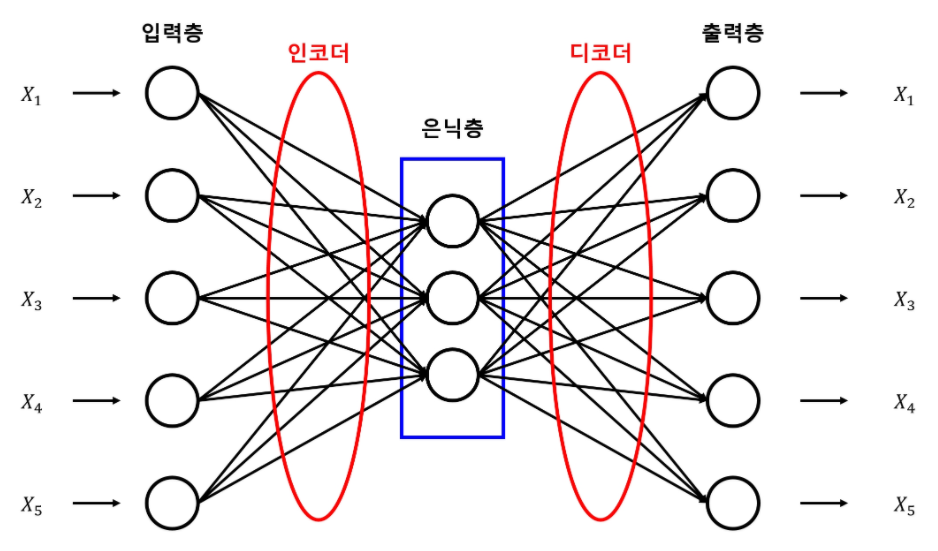
오토 인코더의 핵심은     
   * 입력층으로 들어온 데이터를 **인코더** 를 통해 은닉층으로 내보낸다.
   * 은닉층의 데이터를 **디코더** 를 통해 출력층으로 내보낸다.
   * 만들어진 출력값을 입력값과 비슷해지도록 만드는 가중치를 찾아내는 것이다.    


---------------------------------------------------------
오토인코더는 아웃풋과 인풋이 같은 특별한 타입의 신견망이다. 오토인코더는 극도로 낮은 수준의 인풋 데이터의 대표값을 얻기 위해 비지도학습으로 학습된다. 이 낮은 수준의 피쳐는 실제 데이터에 다시 지도된다(?" These low level features are then deformed back to project the actual data") 한 오토인코더는 스스로의 인풋값을 예측할 수 있도록 회귀 작업을 한다. (다른 말로, identity funcion model이다) 이 신경망은 중간 뉴런에 타이트한 바틀넥을 가지고 있고 효과적인 자기주도적으로 그들을 압축한다. 이것은 인풋을 낮은 차원의 코드로 압박하고, 이 코드는 원래 인풋으로 재창조 될 수 있다.    

----------------------------------------------------
일반적인 오토인코더 구성은 3개의 메인 요소를 가지고 있다. :
   * **Encoding Architecture :** 엔코더 구조는 노드의 수를 줄이는 여러 개의 층으로 구성되어 있고 궁극적으로 은닉층을 줄인다.
   * **Latent View Repersentation :** 은닉층은 가장 낮은 수준의 공간을 나타낸다. 인풋은 줄어들고 정보는 보존된다.
   * **Decoding Architecture :** 디코딩 구조는 인코딩 구조의 거울이지만 매 층의 노드의 수는 증가하며 궁극적으로 아웃풋은 인풋과 유사하다.    

매우 미세하게 조정된 오토인코더 모델은 첫 번째 층을 통과한 같은 인풋을 재건축할 수 있어야 한다. 이 커널에서, 우리는 오토인코더을 살펴볼 것이다. 오토인코더는 이미지 데이터에서 넓게 사용되며 다른 케이스는 아래와 같다 :
  * Dimentionality Reduction
  * Image Compression
  * Image Denoising
  * Image Generation
  * Feature Extraction

## 어떻게 오토인코더가 작동할까?
[내 참고자료ㅎㅎ](https://www.notion.so/Autoencoder-860ddd3d86304bb9aa4fa730078ce9dc)   
오토인코더의 숨겨진 수학을 이해해봅시다. 오토인코더의 주된 아이디어는 높은 차원 데이터의 낮은 수준의 표현을 배우는 것입니다. 예시로 인코딩 과정을 이해해봅시다. 표현 공간 데이터를 생각해봅시다.(N 차원이며 데이터를 나타내는) 그리고 2개의 변수 :x1 과 x2로 표현된 두개의 데이터 포인트를 생각해봅시다. 데이터 [매니폴드](https://greatjoy.tistory.com/51)는 실제 데이터가 표현된 공간입니다.    
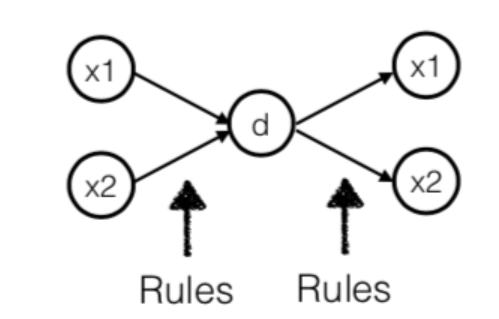    

이 데이터를 표현하기 위해, 우리는 현재 2개의 차원을 사용중입니다. - X와 Y. 그러나 이 공간을 낮은 차원 ie.1D으로 줄임으로써 차원을 낮출 수 있습니다.     
만약 우리가 다음과 같이 정의한다면 :
* Reference Point on the line : A
* Angle L with a horizontal axis 
그러면 어떤 포인트이든지 간에, 만약 B라면, 라인 A위에 Distance `d`의 용어로 표현될 수 있습니다. A와 anlge L 에서부터 
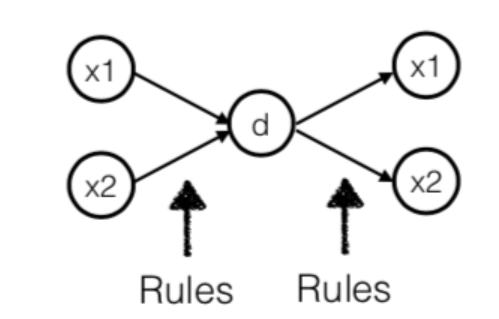    

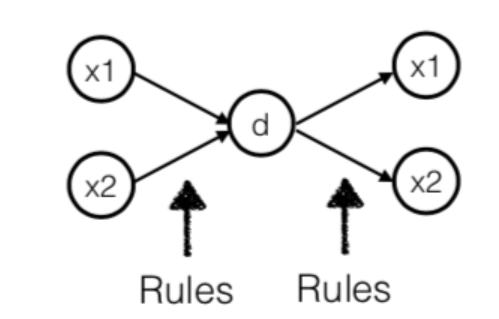

----------------------------------------------------
핵심 질문은 여기 어떤 로직이냐 룰이냐에 있습니다. 포인트 B는 A와 anlge L의 용어로 표현될 수 있습니다. 다른 용어로는 B, A 와 L의 방정식이 뭐냐는 것입니다. 답은 간단합니다. 여기엔 고정된 방정식이 없으나 가장 가능한 방정식이 비지도학습에 의해 구해집니다. 단순한 말로, 학습과정은 B를 A와 L의 형태로 변환하는 rule과 방정식에 의해 결정됩니다.오토인코더로부터 이 과정을 이해해봅시다.    

은닉층이 없는 오토인코더를 가정합니다. 인풋 x1과 x2는 낮은 표현(차원) d로 인코딩되었고 이것은 x1, x2로 프로젝션 됩니다.
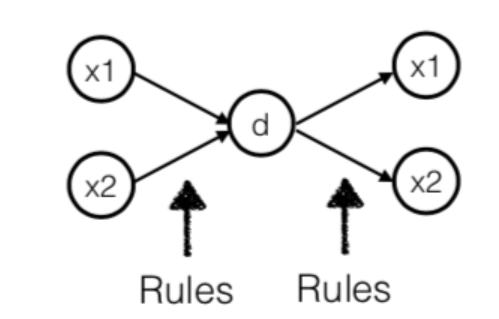    

**Step1:은닉층에서 포인트를 말해보자**
만약 포인트 A와 B의 좌표가 다음과 같다면,
    * Point A : (x1A, x2A)
    * Point B : (x1B, x2B)   
그리고 은닉층의 그늘의 좌표는 아래와 같다 :
(x1A, x2A) -> (0,0)
(x1B, x2B) -> (u1B, u2B)
   * Point A : (0,0)
   * Point B : (u1B, u2B)
u1B 와 u2B는 포인트와 reference point 사이 차원의 형태로 표현된다.  
u1B = x1B - x1A    
u2B = x2B - x2A    

**Step 2: 거리 d와 anlge L과 함께 포인트를 나타내라**
이제, u1B와 u2B는 거리 d와 앵글 L의 조합으로 표현될 수 있다. 만약 앵글L에 의해 x축을 향해 회전한다면, L은 0이 될것이다. 
**=> (d, L)     
=> (d, 0) (after rotation)**     
이것은 인코딩 과정의 출력값이고 낮은 차원의 우리의 데이터를 말한다. 만약 우리가 가중치와 모든 층의 bias와 함께 신경망의 기본적인 방정식을 불러온다면, 그때는     
**=> (d, 0) = W.(u1B, u2B)     
==> (encoding)**    
W는 은닉층의 가중치 매트릭스이다. 그 후, 우리는 디코딩 과정이 인코딩 과정의 거울같은 과정임을 안다.
**=> (u1B, u2B) = Inverse (W).(d, 0)   
==> (decoding)**  
인코딩 구조에서 구해진 은닉층 차원의 data(x1, x2)의 줄어든 형태는 (d,0)이다. 유사하게, 디코딩 구조는 이 원본 형태(u1B, u2B)의 역전파로 전환된다. ->(x1,x2).     
_An important point is that Rules / Learning function / encoding-decoding equation will be different for different types of data._        

**다른 데이터에는 다른 룰**

## UseCase 1 : Image Reconstruction

In [1]:
# Load libraries 
from tensorflow.keras.layers import Dense, Input, Conv2D,LSTM,MaxPool2D,UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Model 

from sklearn.model_selection import train_test_split 
from imgaug import augmenters 
from random import randint 
from numpy import argmax, array_equal

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 

**2. Dataset Preparation**    
Load the dataset, separate predictors and target, normalize the inputs.   

In [2]:
##read dataset 
train = pd.read_csv('data/fashion-mnist_train.csv')
train_x = train[list(train.columns)[1:]].values 
train_y = train['label'].values 

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#normalize and reshape the predictors 
train_x = train_x /255 
train_x 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# create train and validation datasets 
train_x ,val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2)
print('원래 train_x 크기는 :{}, val_x 크기는 :{}'.format(train_x.shape,val_x.shape))

원래 train_x 크기는 :(48000, 784), val_x 크기는 :(12000, 784)


In [7]:
##reshape the inputs 
train_x = train_x.reshape(-1, 784)
print('train_x의 크기는 :',train_x.shape)
val_x = val_x.reshape(-1, 784)
print('val_x의 크기는 :',val_x.shape)

#Q.결과가 이렇게 나올 수가 없는데...뭐지? 

train_x의 크기는 : (48000, 784)
val_x의 크기는 : (12000, 784)


**3. Create Autoencoder architecture**     
1. 인코딩 부분은 3개의 레이어와 2000(?), 1200 그리고 500개의 노드로 이루어져 있다.
2. 인코딩 구조는 10개의 노드로 이루어진 latent view와 연결되어 있으며 
3. 디코딩 구조는 500,1200,2000(?)의 노드로 이루어져 있다. 마지막 레이어는 인풋레이어에서 추출한 숫자이다.

In [8]:
# input layer 
input_layer = Input(shape=(784,))

##encoding architecture 
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

#latent view 
latent_view = Dense(10, activation='sigmoid')(encode_layer3)

##decoding architecture 
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer 
output_layer = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

Next, we will train the model with early stopping callback. 

In [10]:
model.compile(optimizer='adam',loss='mse')
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,
                              patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x,epochs=20, batch_size=2048,
         validation_data=(val_x, val_x),callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 14s 596ms/step - loss: 0.0959 - val_loss: 0.0685
Epoch 2/20
24/24 [==============================] - 13s 553ms/step - loss: 0.0590 - val_loss: 0.0484
Epoch 3/20
24/24 [==============================] - 13s 551ms/step - loss: 0.0439 - val_loss: 0.0400
Epoch 4/20
24/24 [==============================] - 13s 549ms/step - loss: 0.0390 - val_loss: 0.0372
Epoch 5/20
24/24 [==============================] - 14s 564ms/step - loss: 0.0362 - val_loss: 0.0344
Epoch 6/20
24/24 [==============================] - 14s 570ms/step - loss: 0.0330 - val_loss: 0.0311
Epoch 7/20
24/24 [==============================] - 13s 557ms/step - loss: 0.0303 - val_loss: 0.0286
Epoch 8/20
24/24 [==============================] - 13s 562ms/step - loss: 0.0276 - val_loss: 0.0262
Epoch 9/20
24/24 [==============================] - 14s 569ms/step - loss: 0.0259 - val_loss: 0.0249
Epoch 10/20
24/24 [==============================] - 14s 586ms/step - loss: 0.0246 - val_lo

Generate the predictions on validation data 

In [11]:
preds = model.predict(val_x)

Lets plot the original and predicted image    
**Inputs : Actual Images**

<function matplotlib.pyplot.show(*args, **kw)>

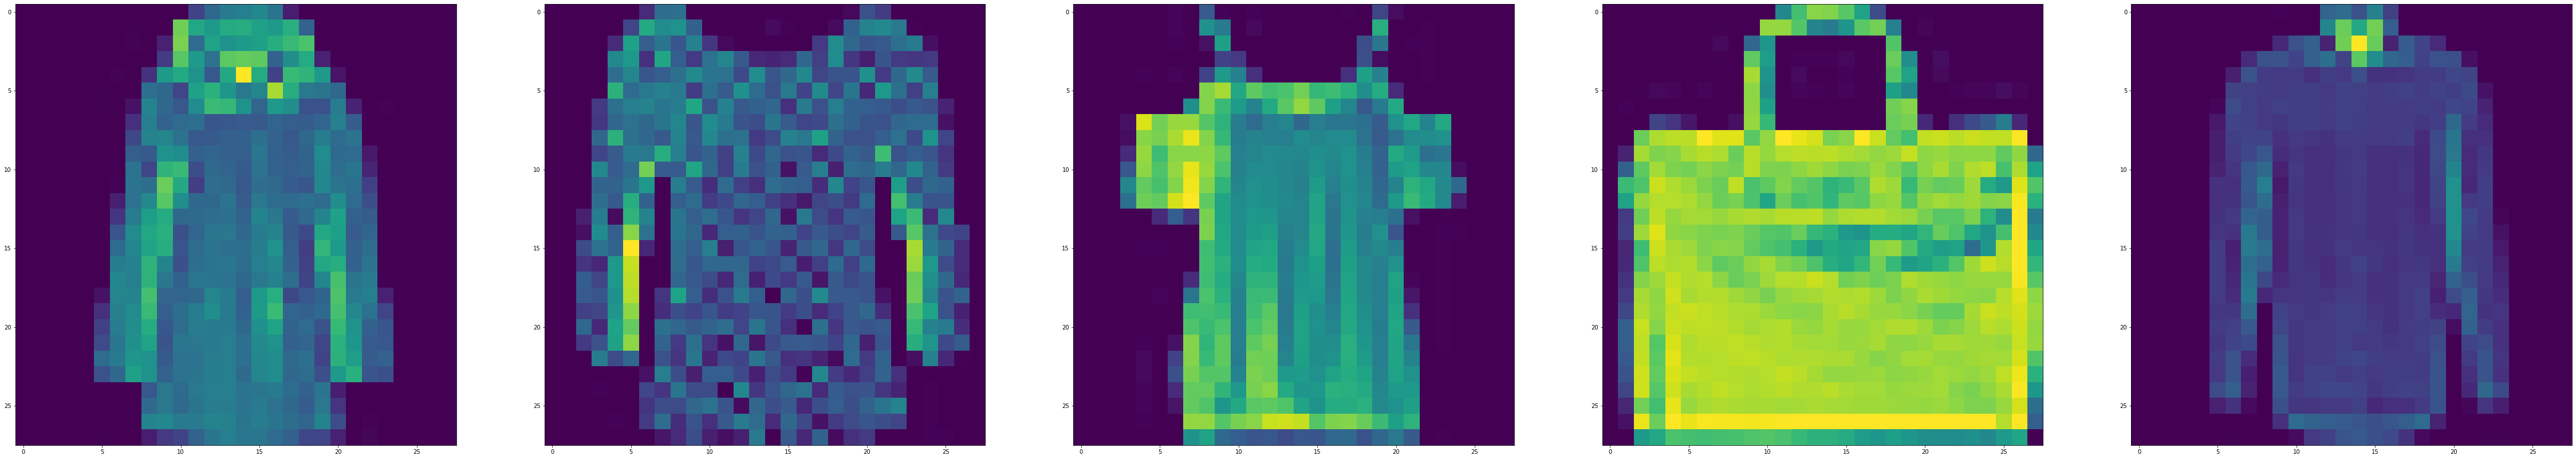

In [13]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5) :
    ax[i].imshow(val_x[i].reshape(28,28))
plt.show

**Predicted : Autoencoder Output** 

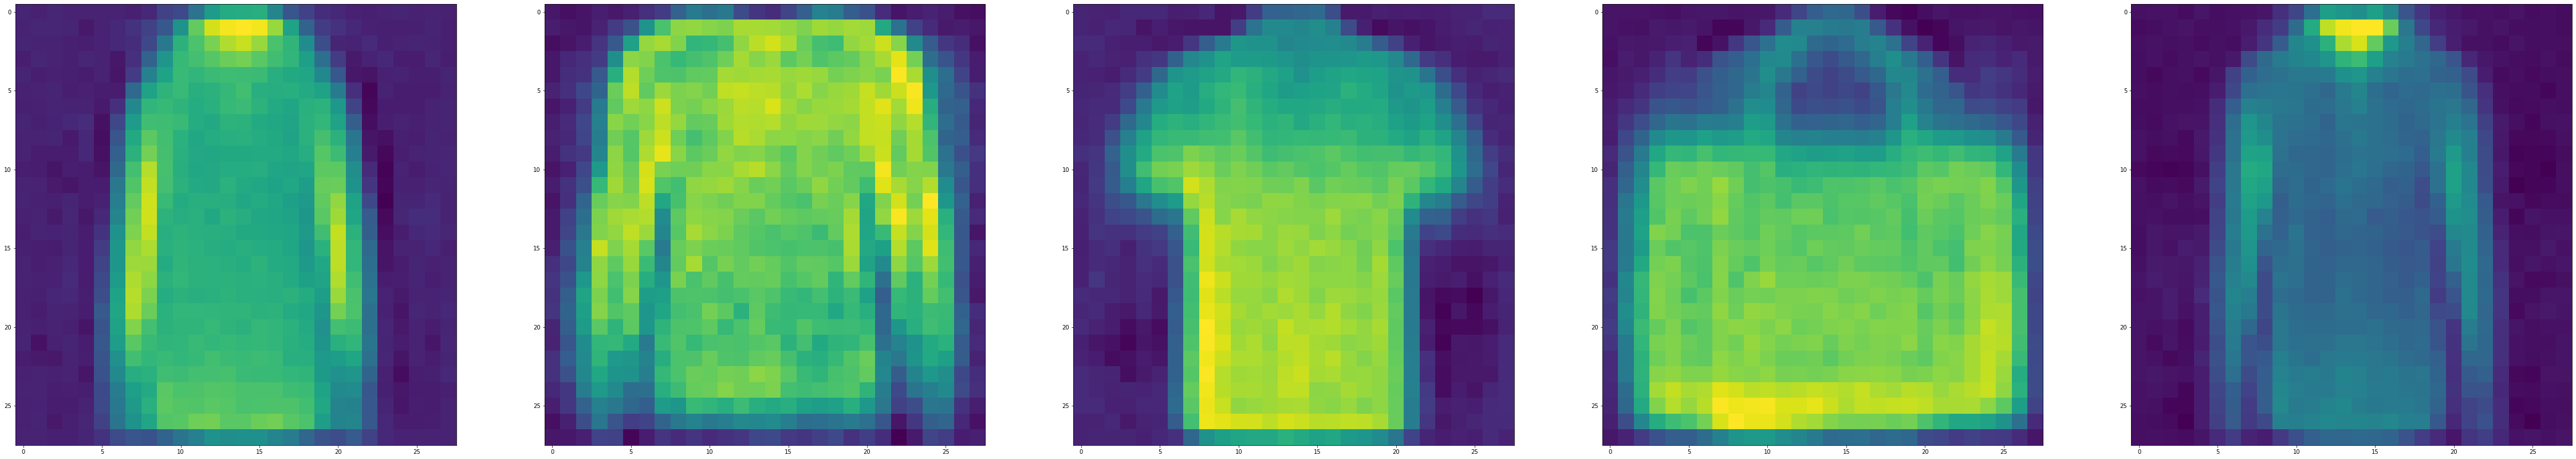

In [14]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5) :
    ax[i].imshow(preds[i].reshape(28,28))
plt.show()

우리는 20개 epochs를 돌린 오토인코더가 이미지를 잘 재건축한 것을 볼 수 있습니다. 이제 오토인코더의 다른 예시를 봅시다.    

## UseCase2 - Image Denoising 
오토인코더는 매우 유용합니다. 이제 오토인코더의 다른 적용을 봅시다. `Image denoising`! 많은 인풋 이미지는 데이터에 노이즈를 포함합니다. 오토인코더는 이런 노이즈를 제거할 수 있습니다.    
1. train_x와 val_x의 이미지 픽셀을 준비합니다.
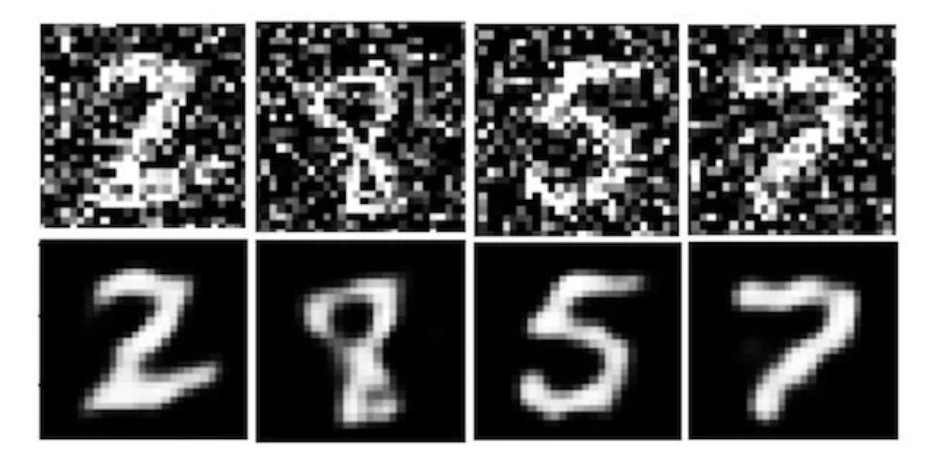

In [28]:
# recreate the train_x array and val_ array
train_x = train[list(train.columns)[1:]].values 
train_x, val_x = train_test_split(train_x, test_size = 0.2)

## normalize and reshape 
train_x = train_x/ 255. 
val_x = val_x/255. 

이 오토인코더 신경망에서, 우리는 컨볼루션 레이어를 더할 수 있습니다. 왜냐하면 컨볼루션 신경망은 이 이미지 데이터에서 매우 잘 작동하기 때문입니다. 이미지 데이터에서 컨볼루션을 적용하기 위해서, 우리는 우리의 인풋데이터를 28 * 28 매트릭스로 reshape 합니다. 

In [29]:
train_x = train_x.reshape(-1,28,28,1)
val_x = val_x.reshape(-1,28,28,1)

**Noisy Images**     
[노이즈에 관한 블로그](https://m.blog.naver.com/PostView.nhn?blogId=laonple&logNo=220811027599&proxyReferer=https:%2F%2Fwww.google.com%2F)  

`imaug package`를 이용합니다. 이 패키지는 다른 변형의 이미지의 증대에 익숙하게 사용됩니다. 이 변형 중 하나는 노이즈도 될 수 있습니다. 다른 타입의 노이즈는 이미지에 더해질 수 있습니다. 예를 들어 :
* Salt and Pepper Noise 
* Gaussian Noise 
* Peridic Noise 
* Speckle Noise 
salt and pepper을 우리의 데이터 대입해봅시다. 이 노이즈는 ` impulse noise` 라고도 불립니다. This noise introduces sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.   


In [31]:
# Let's add sample noise - Salt and Pepper 
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

# Q. 왜 굳이 이렇게...?
train_x_n = seq_object.augment_images(train_x * 255)/ 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

Before adding noise 

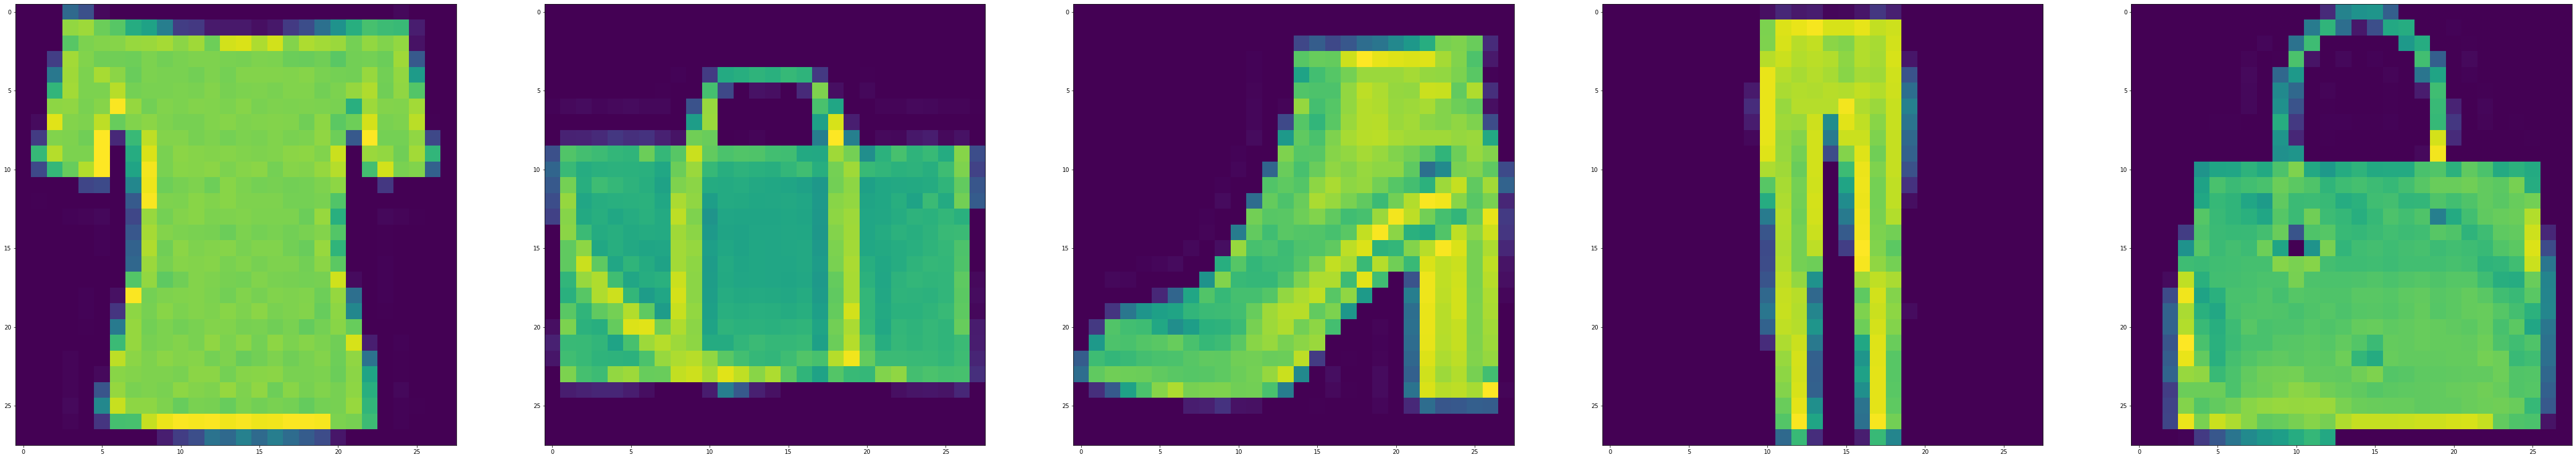

In [32]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

After adding noise 

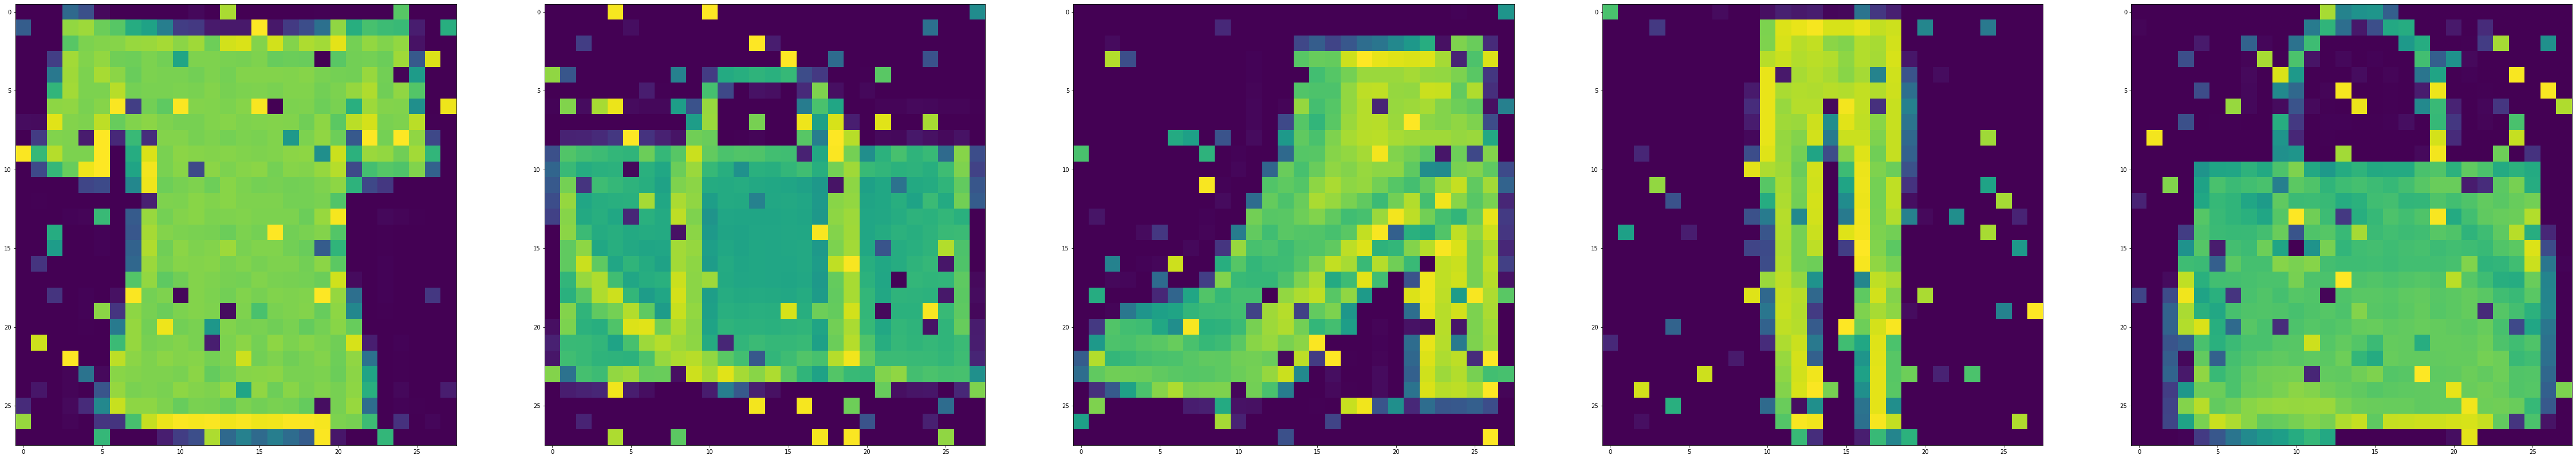

In [33]:
f,ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28,28))
plt.show()

이제 오토인코더를 위한 구조를 짜보자. 어떤 타입의 네트워크가 이 문제를 해결할 수 있는 지 보자         

**Encoding 구조 :** 
3개의 컨볼루션 레이어와 3개의 맥스 풀링 레이어를 차례차례 쌓는다. Relu는 활성화 함수로 사용되고 padding은 `same`. 맥스 풀링의 역할은 이미지 차원을 낮추는 것이다. 이 레이어는 max filter에 적용되고 to non-overlapping subregions of the initial representation.       

**Decoding 구조 :** 
컨볼루션 레이어도 같은 차원으로 사용되고(in reverse manner) 인코딩 구조와 비슷하다. 그러나 3개의 맥스풀링 레이어 대신에 우리는 3개의 upsampling 레이어를 쌓는다. 활성화 함수는 relu, padding은 컨볼루션 레이어 안에 있고 인코딩과 똑같이 작용한다. 업샘플링 레이어의 목적은 인풋 벡터의 차원을 높이는 것이다. 맥스 풀링 작동은 non-invertible, _하지만 대략적인 inverse는 각각의 pooling 지역안에서 max인 장소로 뽑아진다._(뭔 말인지 모르겠음 ㅠ)Umsampling layers make use of this property to project the reconstructions from a low dimentional feature space.   

In [40]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [41]:
model_2.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 16)         

In [42]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=5,mode='auto')
history = model_2.fit(train_x_n, train_x,epochs=10, batch_size=2048, 
                     validation_data=(val_x_n,val_x),callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 131s 5s/step - loss: 0.0882 - val_loss: 0.0537
Epoch 2/10
24/24 [==============================] - 126s 5s/step - loss: 0.0444 - val_loss: 0.0371
Epoch 3/10
24/24 [==============================] - 123s 5s/step - loss: 0.0341 - val_loss: 0.0306
Epoch 4/10
24/24 [==============================] - 143s 6s/step - loss: 0.0282 - val_loss: 0.0257
Epoch 5/10
24/24 [==============================] - 131s 5s/step - loss: 0.0247 - val_loss: 0.0237
Epoch 6/10
24/24 [==============================] - 130s 5s/step - loss: 0.0230 - val_loss: 0.0223
Epoch 7/10
24/24 [==============================] - 125s 5s/step - loss: 0.0217 - val_loss: 0.0213
Epoch 8/10
24/24 [==============================] - 126s 5s/step - loss: 0.0209 - val_loss: 0.0204
Epoch 9/10
24/24 [==============================] - 127s 5s/step - loss: 0.0202 - val_loss: 0.0201
Epoch 10/10
24/24 [==============================] - 133s 6s/step - loss: 0.0196 - val_loss: 0.0192


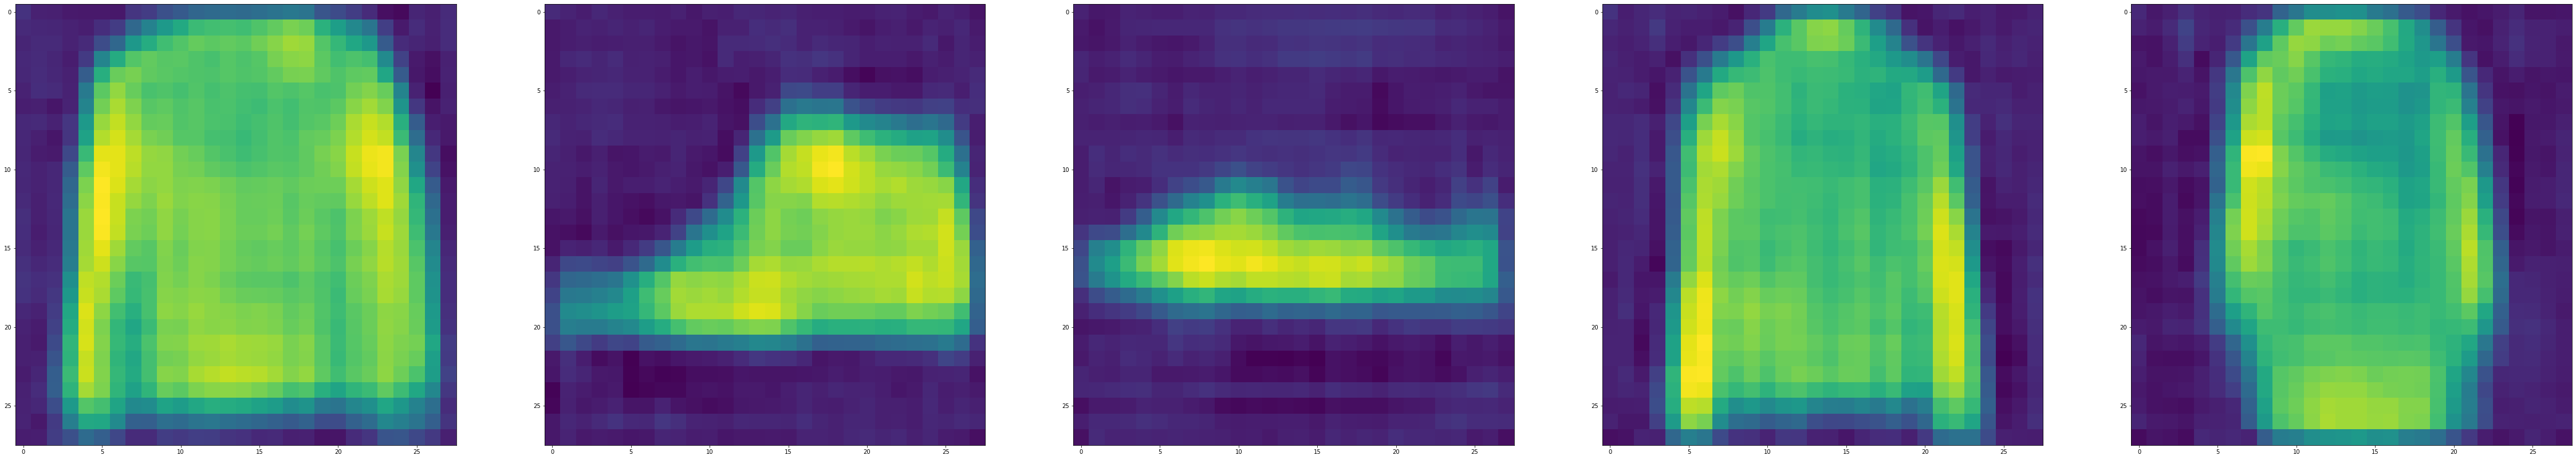

In [43]:
preds = model_2.predict(val_x_n[:10])
f,ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5,10) :
    ax[i-5].imshow(preds[i].reshape(28,28))
plt.show()

In this implementation, I have not traiened this network for longer epoochs, but for better predictions, you can train the network for larger number of epoochs say somewhere in the range of 500 - 1000.

## UseCase 3: Sequence to Sequence Prediction using AutoEncoders 
[참고!](https://keraskorea.github.io/posts/2018-10-23-keras_autoencoder/)     
이전 예시 샘플에서 우리는 이미지를 기본적으로 2차원으로 두었습니다. 이번 예시에서는 순차데이터(sequence data)를 1차원으로 입력할 것입니다. 순차데이터의 예시로른 `time seres`, `text data` 등이 있습니다.  Example of sequence data are time series data and text data. This usecase can be applied in machine translation. 우리는 LSTM을 사용합니다.      

대부분의 코드는 다음의 [레퍼런스](https://machinelearningmastery.com/develop-encoder-decoder-model-sequence-sequence-prediction-keras/)를 참고했습니다.    
  
**Autoencoder Architecture** 
이 사용예시의 구조는 소스 시퀀스를 인코드하는 인코더를 포함하고 인코딩된 소스 시퀀스를 타겟 시퀀스(디코더라고 불리는)로 디코드시킵니다. 첫번째로, LSTM의 internal working을 이해해봅시다. 
* The Long Short-Term Memory, or LSTM, is a recurrent neural network that is comprised of internal gates.
* Unlike other recurrent neural networks, the network’s internal gates allow the model to be trained successfully using backpropagation through time, or BPTT, and avoid the vanishing gradients problem.
* We can define the number of LSTM memory units in the LSTM layer, Each unit or cell within the layer has an internal memory / cell state, often abbreviated as “c“, and outputs a hidden state, often abbreviated as “h“.
* By using Keras, we can access both output states of the LSTM layer as well as the current states of the LSTM layers.

이제 LSTM 레이어를 위한 오토인코더 구조를 만들어봅시다. 아래 두개의 구성요소가 있습니다. :
* 한 인코더 구조는 입력값으로서 순서를 가지며 LSTM의 현재 상태를 출력값으로 반환한다.
* 디코더 구조는 순서를 가지며 LSTM 상태를 입력값으로 인코더 하며 디코드된 출력 순서를 반환한다.
* 우리는 LSTM의 은닉층과 메모리 상태를 저장하고 접근하여 unseen 데이터에서 대략적인 예측하는 중 사용할 수 있다.   

첫 번째로, 고정된 길이의 랜덤 시퀀스를 포함한 순서 데이터를 생성해봅시다. 우리는 랜덤 시퀀스를 생성하기 위한 함수를 만들 것입니다. 
* X1 = he input sequence containing random numbers
* X2 = the padded sequence which is used as the seed to reproduce the other elements of the sequence 
* y = the target sequence or the actual sequence

In [54]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        ## create random numbers sequence - input 
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        
        ## create target sequence
        target = inp_seq[:n_out]
    
        ## create padded sequence / seed sequence 
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]  
        
        # convert the elements to categorical using keras api
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
    
    # remove unnecessary dimention
    X1 = np.squeeze(np.array(X1), axis=1) 
    X2 = np.squeeze(np.array(X2), axis=1) 
    y  = np.squeeze(np.array(y), axis=1) 
    return X1, X2, y

In [55]:
samples = 100000
features = 51 
inp_size = 6 
out_size = 3 

inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)
print("Shapes: ", inputs.shape, seeds.shape, outputs.shape)
print ("Here is first categorically encoded input sequence looks like: ", )
inputs[0][0]

Shapes:  (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
Here is first categorically encoded input sequence looks like: 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

다음으로, 케라스에서 우리 모델의 구조를 만들어보자 

In [66]:
def define_models(n_input, n_output) :
    ## 인코더 구조 명명
    ## 입력 : sequence
    ## 출력 : encoder states 
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state= True)
    encoder_outputs , state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h,state_c]
    
    ## 인코더 - 디코더 구조
    ## 입력 : a seed sequnce
    ## 출력 : decoder states, decoded output
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation = 'softmax')
    decoder_outputs = decoder_dense(decoder_outputs)    
    model =Model([encoder_inputs,decoder_inputs],decoder_outputs)
    
    ## 디코더 모델 명명
    ## 입력값 : current state + encoded sequence
    ## 출력값 : decoded sequence 
    encoder_model = Model(encoder_inputs,encoder_states)
    decoder_state_input_h =Input(shape=(128,))
    decoder_state_input_c =Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    
    decoder_outputs, state_h,state_c = decoder_lstm(decoder_inputs,initial_state=decoder_states_inputs)
    decoder_states =[state_h,state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                         [decoder_outputs] + decoder_states)
    
    return model, encoder_model, decoder_model

In [67]:
autoencoder, encoder_model, decoder_model = define_models(features, features)

In [68]:
encoder_model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, None, 51)]        0         
_________________________________________________________________
lstm_6 (LSTM)                [(None, 128), (None, 128) 92160     
Total params: 92,160
Trainable params: 92,160
Non-trainable params: 0
_________________________________________________________________


In [69]:
decoder_model.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
lstm_7 (LSTM)                   [(None, None, 128),  92160       input_17[0][0]                   
                                                                 input_18[0][0]       

In [70]:
autoencoder.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
lstm_6 (LSTM)                   [(None, 128), (None, 92160       input_16[0][0]                   
__________________________________________________________________________________________________
lstm_7 (LSTM)                   [(None, None, 128),  92160       input_17[0][0]                   
                                                                 lstm_6[0][1]         

Now, lets train the autoencoder model using Adam optimizer and Categorical Cross Entropy loss function

In [71]:
autoencoder.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
autoencoder.fit([inputs,seeds],outputs, epochs=1)

3125/3125 [==============================] - 30s 10ms/step - loss: 0.6572 - acc: 0.7912


Lets write a function to predict the sequence based on input sequence

In [72]:
def reverse_onehot(encoded_seq) :
    return [argmax(vector) for vector in encoded_seq]

def predict_sequence(encoder, decoder, sequence) :
    output= [] 
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1,1, features)
    
    current_state = encoder.predict(sequence)
    for t in range(out_size) :
        pred, h, c = decoder.predict([target_seq]+ current_state)
        output.append(pred[0,0, :])
        current_state  = [h,c]
        target_seq = pred 
        
    return np.array(output)

Generate some predictions 

In [75]:
for k in range(5) :
    X1, X2, y = dataset_preparation(inp_size, out_size, features,1)
    target = predict_sequence(encoder_model,decoder_model,X1)
    print('\nInput Sequence=%s SeedSequence=%s, PredictedSequence=%s'% (reverse_onehot(X1[0]),
                                                                       reverse_onehot(y[0]),
                                                                       reverse_onehot(target)))


Input Sequence=[25, 35, 9, 26, 20, 27] SeedSequence=[9, 35, 25], PredictedSequence=[9, 35, 25]

Input Sequence=[47, 14, 6, 9, 30, 34] SeedSequence=[6, 14, 47], PredictedSequence=[6, 14, 47]

Input Sequence=[44, 12, 6, 20, 12, 4] SeedSequence=[6, 12, 44], PredictedSequence=[6, 12, 44]

Input Sequence=[22, 24, 50, 41, 31, 10] SeedSequence=[50, 24, 22], PredictedSequence=[50, 24, 22]

Input Sequence=[22, 36, 14, 18, 43, 43] SeedSequence=[14, 36, 22], PredictedSequence=[14, 36, 22]


## Excellent References 
1.https://www.analyticsvidhya.com/blog/2018/06/unsupervised-deep-learning-computer-vision/     
2.https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798        
3.https://blog.keras.io/building-autoencoders-in-keras.html 
4.https://cs.stanford.edu/people/karpathy/convnetjs/demo/autoencoder.html    
5.https://machinelearningmastery.com/develop-encoder-decoder-model-sequence-sequence-prediction-keras/